Notes:
1. use no grad for initialization, and turn it on when necessary
2. for non linear, use standard linear with relu, sig, and tanh
3. use standard linear layers, transformed input (x*x, x) and custom neurons ( a * x ** b), recurrent layers (simulate expon using a loop)
4. use trainable sigmoid to capture exponential non lineararity, convolutional layers to find features and linear to logic those layers
5. normal, deep, wide arch

In [1]:
# imports

import os
import torch
import numpy as np
import sklearn


In [2]:
# get device

device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# get dtype, not all devices can handle half precision

dtype = torch.float16 if device == "cuda" else torch.float

In [4]:
# raw data loader

file = 'data/poly.npy'
file_no_extension = os.path.splitext(file)

array = np.load(file)
data = array[0].copy()
labels = array[1].copy()


In [5]:
# cleaning and transforming, different types

data = (data - data.mean()) / data.std()

In [6]:
# seperate into train, valid and test sets with skilearn

from sklearn.model_selection import train_test_split

test_data_np, train_data_np, test_label_np, train_label_np = train_test_split(data, labels, test_size=0.8)


In [7]:
# Convert to tensors, align shapes, datatypes and device
# shape = (len(test_data_np), 1)

test_data = torch.tensor(test_data_np, dtype=dtype, device=device).reshape(len(test_data_np), 1)
test_label = torch.tensor(test_label_np, dtype=dtype, device=device).reshape(len(test_label_np), 1)
train_data = torch.tensor(train_data_np, dtype=dtype, device=device).reshape(len(train_data_np), 1)
train_label = torch.tensor(train_label_np, dtype=dtype, device=device).reshape(len(train_label_np), 1)



In [8]:
# use dataloader to convert to tensors

from torch.utils.data import Dataset

class Data(Dataset):
    def __init__(self, train, label):
        self.data = train
        self.label = label
      
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.label[idx]
        
train_set = Data(train_data, train_label)

In [17]:
# calc gain / weight initialization scale
# Define a function to initialize Linear weights.
# Note that no_grad() is used here to avoid tracking this computation in the autograd graph.
@torch.no_grad()
def init_weights(m):
  if isinstance(m, nn.Linear):
    nn.init.xavier_normal_(m.weight)
    m.bias.fill_(0.0)

# Apply the function recursively on the module and its submodules.
dynamic_net.apply(init_weights)

ValueError: Unsupported nonlinearity tim

In [9]:
# build model / load state dict / load whole model / explicitly init param weights
import models

model = models.Model0_2()
model.to(dtype)
model.to(device)


Model0_2(
  (lin1): Linear(in_features=1, out_features=50, bias=True)
  (lin2): Linear(in_features=50, out_features=50, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
)

torch.float32
torch.float32


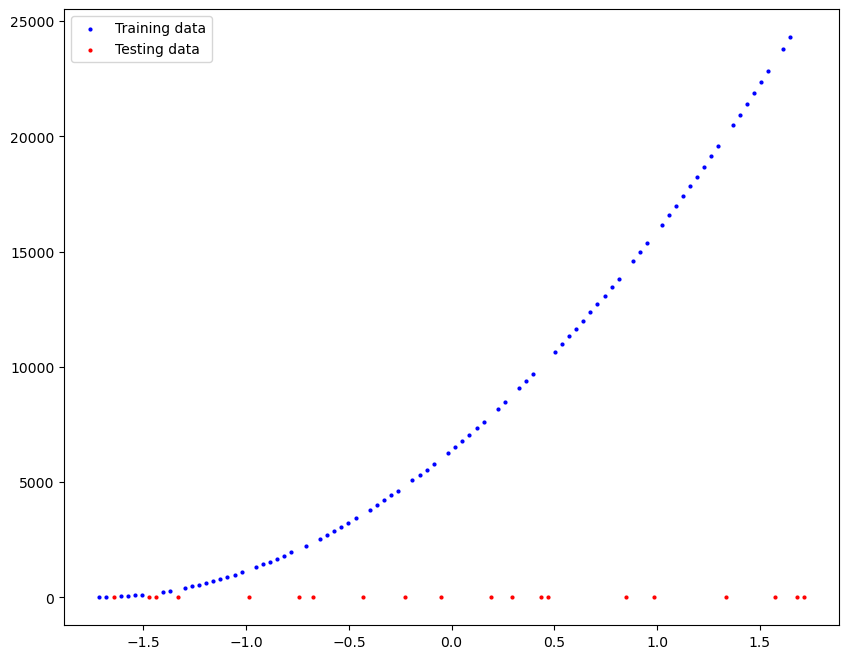

In [10]:
# check for runtime errors / init predictions

from visuals.display import train_v_test

for i in model.parameters():
    print(i.dtype)
    break
print(test_data.dtype)

with torch.inference_mode():
    preds = model(test_data.reshape(len(test_data_np), 1))
    
train_v_test(train_data, train_label, test_data, preds.numpy())

In [11]:
# set up hyperparameters
epochs = 100
optim = torch.optim.SGD(model.parameters(), lr=0.01)
error = torch.nn.MSELoss()

In [12]:
# init tensorboard, use event monitor or profiler?

tensor([-0.3984,  1.4723,  0.0173,  1.0220,  0.3637, -1.1952, -0.9527,  0.9527,
        -1.7148,  1.6455, -0.8834,  1.2991, -0.5716, -1.5762, -0.1905, -1.6109,
        -0.6062,  0.6062, -0.8487, -1.0566,  1.1259,  0.1212,  0.5023,  0.8141,
        -1.4030, -0.4677, -1.0220,  1.4030,  0.5716,  0.0866, -1.3684,  0.3984,
        -0.5370,  0.3291,  0.2598, -1.2298,  0.2252,  0.7448, -0.1559, -1.1259,
         1.0566, -0.1212, -1.6802, -0.7795, -1.1605,  1.4377,  1.6109,  1.5070,
         1.2645, -0.0866, -0.5023,  1.3684,  0.6755,  1.2298, -0.9180, -0.3637,
         0.6409, -0.7102, -0.3291, -0.6409,  0.7102,  0.8834, -1.2991, -1.0912,
        -0.0173, -0.2598,  0.9180,  0.7795,  1.1605, -1.5416, -1.5070,  0.0520,
         0.5370,  1.1952,  0.1559,  1.0912,  1.5416, -0.2945, -1.2645, -0.8141])

In [13]:
# train model, no dataloader, manual batching
model.train()
for _ in range(epochs):
    for z in zip(train_data, train_label):
        i, j = z
        train_pred = model(i)
        '''for i in zip(train_pred, train_label):
            print(i)'''
        loss = error(train_pred, j)
        optim.zero_grad()
        loss.backward()
        optim.step()

In [14]:
# train model, with dataloader

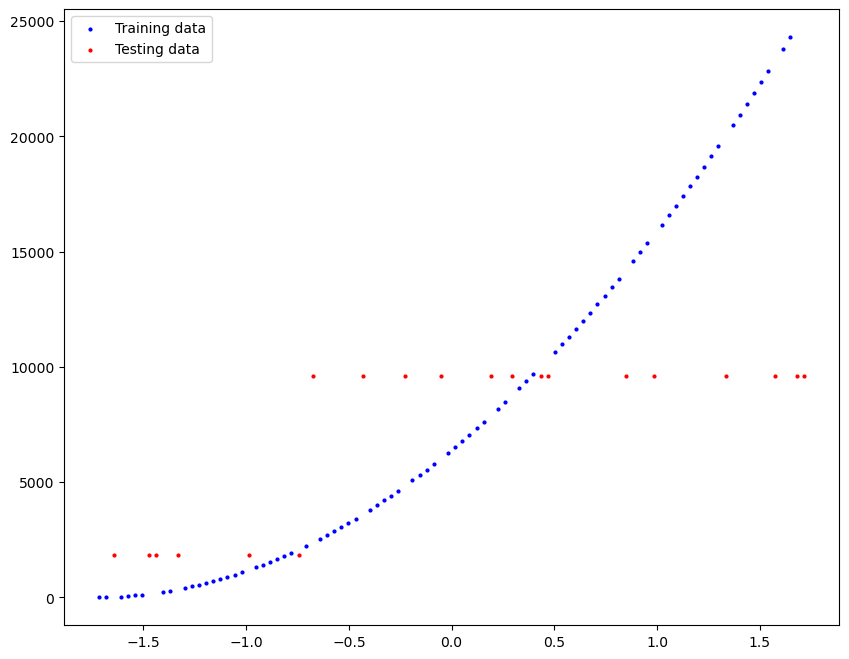

In [15]:
# run model

with torch.inference_mode():
    preds = model(test_data.reshape(len(test_data_np), 1))
    

In [ ]:
# eval model -- tensorboard, events, profiler

In [ ]:
# eval learning, scatterplots, learning rate, confusion matrixes

In [ ]:
# improve model

In [ ]:
# save model state dict

In [32]:
# save entire model
print(os.getcwd())
cwd = os.getcwd()
path = os.path.join(cwd, 'trained_models')
path = os.path.join(path, f'{model}_linear.pth')
print(path)
torch.save(model, path)

C:\Users\Daily\mynn\workflow
True
C:\Users\Daily\mynn\workflow\1-10-10-10-1_linear.pth
